In [33]:
import pandas as pd

In [39]:
df= pd.read_csv("C:\\Users\smailey\Desktop\lecture\csv\Titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [40]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'] , inplace=True,axis=1)

In [41]:
df.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,0
1,1,female,38.0,C,1
2,3,female,26.0,S,1
3,1,female,35.0,S,1
4,3,male,35.0,S,0


In [43]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [46]:
df.describe()

,Pclass,Age,Survived
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,0.383838
std,0.836071,14.526497,0.486592
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,38.000000,1.000000
max,3.000000,80.000000,1.000000


In [48]:
df['Embarked'].dropna(inplace=True)

In [50]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [52]:
df.dropna(subset =['Embarked'],inplace=True)


In [53]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Embarked      0
Survived      0
dtype: int64

In [55]:
x = df['Age'].mean()

In [56]:
round(x)

30

In [57]:
df['Age'].median()

28.0

In [59]:
df['Age'] = df['Age'].fillna(x)

In [60]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

In [61]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [63]:
df.shape

(889, 5)

In [65]:
final = pd.get_dummies(data=df,columns=['Sex','Embarked'],drop_first=True)

In [66]:
final.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,1
1,1,38.0,1,0,0,0
2,3,26.0,1,0,0,1
3,1,35.0,1,0,0,1
4,3,35.0,0,1,0,1


In [67]:
X = final.drop("Survived",axis=1)

In [69]:
X.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1
1,1,38.0,0,0,0
2,3,26.0,0,0,1
3,1,35.0,0,0,1
4,3,35.0,1,0,1


In [70]:
y = df.Survived

In [71]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [74]:
X_train.shape

(711, 5)

In [75]:
X_test.shape

(178, 5)

In [76]:
y_train.shape

(711,)

In [77]:
y_test.shape

(178,)

In [78]:
from sklearn.naive_bayes import BernoulliNB

In [79]:
model = BernoulliNB()

In [80]:
model.fit(X_train,y_train)

BernoulliNB()

In [81]:
model.score(X_test,y_test)

0.797752808988764

In [83]:
y_pred = model.predict(X_test)

In [85]:
y_pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [86]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
cm = confusion_matrix(y_test,y_pred)

In [89]:
cm

array([[89, 20],
       [16, 53]], dtype=int64)

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

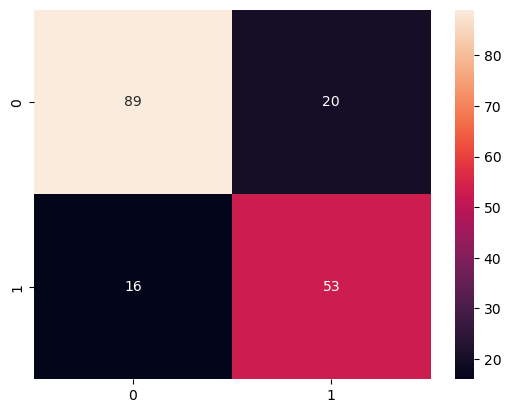

In [93]:
sns.heatmap(cm,annot=True)
plt.show()

In [95]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train , y_train)
model.score(X_test,y_test)

0.702247191011236

In [96]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train , y_train)
model.score(X_test,y_test)

0.7808988764044944

Supervised - 

Regreesion - Linear regression
classification - logistic regression 
               - KNN(k=3)
               - Naive bayes - BernolliNB(0-1) - multinomial(0-1) - GaussainNB(continues)